In [54]:
## Pre-requisite imports use this since the module for ospybook ##
## is depreciated all of the codes produces an error without exception ##
## as per dubugging the module ill be uploading updated module for this coursecode ##

import os #be sure to import this if using vs to access files
import sys
from osgeo import ogr 
import geopandas as gpd
import matplotlib.pyplot as plt
from ospybook.vectorplotter import VectorPlotter

## <-- END --> ##

###### FILES DIRECTORY #####

data_dir = r'C:\Users\dieux.iii\Documents\4th Year Graduating Yey\Geomatics\Data Source\osgeopy-data'
data_path_global = r"C:\Users\dieux.iii\Documents\4th Year Graduating Yey\Geomatics\Data Source\osgeopy-data\osgeopy-data-global\osgeopy-data\global\ne_50m_admin_0_countries.shp"
# Set the path to your shapefile
world = gpd.read_file(data_path_global)


##### <---- END ----> #####

59.5, 11.5
POINT (59.5 11.5 0)
POINT (59.5 13.0 0)
POINT (59.5 13.0 0)
POINT (59.5 11.5 2)


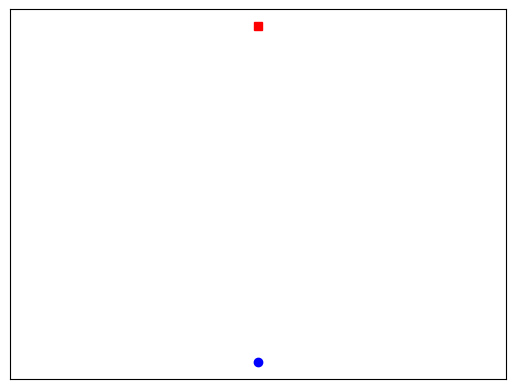

In [ ]:
# Create the firepit point.
firepit = ogr.Geometry(ogr.wkbPoint)
firepit.AddPoint(59.5, 11.5)

# Try out GetX and GetY.
x, y = firepit.GetX(), firepit.GetY()
print('{}, {}'.format(x, y))

# Take a look at the point.
print(firepit)
vp = VectorPlotter(True)
vp.plot(firepit, 'bo')

# Edit the point coordinates.
firepit.AddPoint(59.5, 13)
vp.plot(firepit, 'rs')
print(firepit)

# Or edit the point using SetPoint instead of AddPoint.
firepit.SetPoint(0, 59.5, 13)
print(firepit)

# Make a 2.5D point.
firepit = ogr.Geometry(ogr.wkbPoint25D)
firepit.AddPoint(59.5, 11.5, 2)
print(firepit)


MULTIPOINT (67.5 16.0 0,73 31 0,91.0 24.5 0)


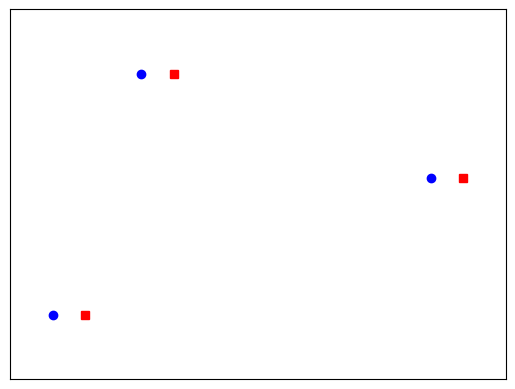

In [ ]:
from ospybook.vectorplotter import VectorPlotter
from osgeo import ogr

# Create the multipoint to hold the water spigots. Create multipoint and point
# geometries. For each spigot, edit the point coordinates and add the point to
# the multipoint.
faucets = ogr.Geometry(ogr.wkbMultiPoint)
faucet = ogr.Geometry(ogr.wkbPoint)
faucet.AddPoint(67.5, 16)
faucets.AddGeometry(faucet)
faucet.AddPoint(73, 31)
faucets.AddGeometry(faucet)
faucet.AddPoint(91, 24.5)
faucets.AddGeometry(faucet)

# Take a look at the multipoint.
vp.clear()
vp.plot(faucets, 'bo')
vp.zoom(-5)
print(faucets)

# Move all spigots two units to the east. After plotting, you will probably
# have to zoom out a bit in order to really see what happened.
for i in range(faucets.GetGeometryCount()):
    pt = faucets.GetGeometryRef(i)
    pt.AddPoint(pt.GetX() + 2, pt.GetY())
vp.plot(faucets, 'rs')
vp.zoom(-5)


Number 3

The code functiuon as a loop `for i in range(faucets.GetGeometryCount()):` starting this line the loop that will iterate over each geometry in a layer or feature called `faucets`. The number of iterations is determined by the number of geometries in `faucets`.  `pt = faucets.GetGeometryRef(i):` This line gets a reference to the `i`-th geometry in `faucets` and assigns it to the variable `pt`. While the `pt.AddPoint(pt.GetX() + 2, pt.GetY()):` adds a new point to the `pt` geometry. The new point's X coordinate is the original point's X coordinate plus 2, and its Y coordinate is the same as the original point's Y coordinate.

LINESTRING (54 37 0,62.0 35.5 0,70.5 38.0 0,74.5 41.5 0)
LINESTRING (54 38 0,62.0 36.5 0,70.5 39.0 0,74.5 42.5 0)
4
0
[(54.0, 37.0, 0.0), (62.0, 35.5, 0.0), (70.5, 38.0, 0.0), (74.5, 41.5, 0.0)]
[(54.0, 37.0, 0.0), (62.0, 35.5, 0.0), (66.5, 35), (70.5, 38.0, 0.0), (74.5, 41.5, 0.0)]


AttributeError: 'NoneType' object has no attribute 'GetLayer'

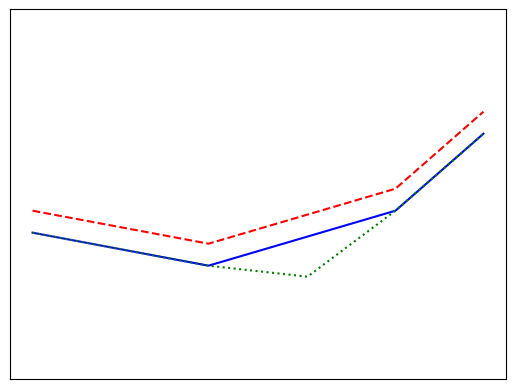

In [ ]:
data_dir_line =r'C:\Users\dieux.iii\Documents\4th Year Graduating Yey\Geomatics\Data Source\osgeopy-data\osgeopy-data-misc\osgeopy-data\misc\line-example.geojson'

###########################  6.3.1  Single lines  #############################

# Create the sidewalk line. Make sure to add the vertices in order.
sidewalk = ogr.Geometry(ogr.wkbLineString)
sidewalk.AddPoint(54, 37)
sidewalk.AddPoint(62, 35.5)
sidewalk.AddPoint(70.5, 38)
sidewalk.AddPoint(74.5, 41.5)

# Take a look at the line.
vp = VectorPlotter(True)
vp.plot(sidewalk, 'b-')
print(sidewalk)

# Move the line one unit to the north.
for i in range(sidewalk.GetPointCount()):
    sidewalk.SetPoint(i, sidewalk.GetX(i), sidewalk.GetY(i) + 1)
vp.plot(sidewalk, 'r--')
print(sidewalk)

# Try out GetGeometryCount to prove it that it returns zero for a single
# geometry.
print(sidewalk.GetPointCount()) # vertices
print(sidewalk.GetGeometryCount()) # sub-geometries

# Move the sidewalk back to its original location for the next example.
for i in range(sidewalk.GetPointCount()):
    sidewalk.SetPoint(i, sidewalk.GetX(i), sidewalk.GetY(i) - 1)

# Look at the list of tuples containing vertex coordinates.
print(sidewalk.GetPoints())

# Insert a new vertex between the 2nd and 3rd vertices.
vertices = sidewalk.GetPoints()
vertices[2:2] = [(66.5, 35)]
print(vertices)

# Create a new line geometry from the list of vertices.
new_sidewalk = ogr.Geometry(ogr.wkbLineString)
for vertex in vertices:
    new_sidewalk.AddPoint(*vertex)
vp.plot(new_sidewalk, 'g:')

# Get the original line for the multiple vertices example.
ds = ogr.Open(os.path.join(data_dir_line))
lyr = ds.GetLayer()
feature = lyr.GetFeature(0)
line = feature.geometry().Clone()
vp.clear()
vp.plot(line, 'b-')

# Add a bunch of vertices at different locations. Start from the end so that
# earlier indices don't get messed up.
vertices = line.GetPoints()
vertices[26:26] = [(87, 57)]
vertices[19:19] = [(95, 38), (97, 43), (101, 42)]
vertices[11:11] = [(121, 18)]
vertices[5:5] = [(67, 32), (74, 30)]
new_line = ogr.Geometry(ogr.wkbLineString)
for vertex in vertices:
    new_line.AddPoint(*vertex)
vp.plot(new_line, 'b--')

# Insert a vertex without creating a new line.
vertices = sidewalk.GetPoints()
vertices[2:2] = [(66.5, 35)]
for i in range(len(vertices)):
    sidewalk.SetPoint(i, *vertices[i])
vp.plot(sidewalk, 'k-', lw=3)


LINESTRING (54 37 0,62.0 35.5 0,70.5 38.0 0,74.5 41.5 0)


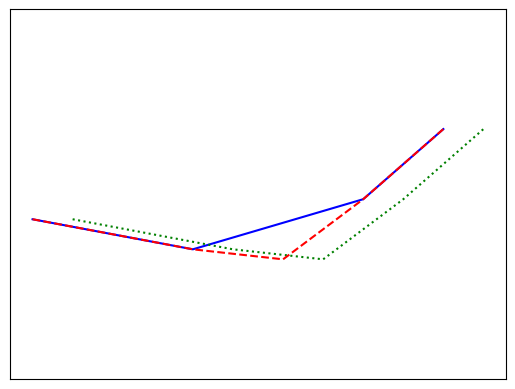

In [ ]:
# Create the sidewalk line. Make sure to add the vertices in order.
sidewalk = ogr.Geometry(ogr.wkbLineString)
sidewalk.AddPoint(54, 37)
sidewalk.AddPoint(62, 35.5)
sidewalk.AddPoint(70.5, 38)
sidewalk.AddPoint(74.5, 41.5)

# Take a look at the line.
vp = VectorPlotter(True)
vp.plot(sidewalk, 'b-')
print(sidewalk)


# Create a new line geometry from the list of vertices with different coordinates.
#the newly created line is annotated with a green dashed line
new_sidewalk = ogr.Geometry(ogr.wkbLineString)
for vertex in vertices:
    x, y = vertex[0], vertex[1]
    # Adjust the coordinate of the vertex here
    x += 2
    new_sidewalk.AddPoint(x, y)
vp.plot(new_sidewalk, 'g:')

#Adjusting the vertex coordinates in place using SetPoint
#the adjusted vertex is annotated with a red dashed line
for i in range(new_sidewalk.GetPointCount()):
    x, y = new_sidewalk.GetX(i), new_sidewalk.GetY(i)
    # Adjust the coordinate of the vertex here
    x -= 2
    new_sidewalk.SetPoint(i, x, y)
vp.plot(new_sidewalk, 'r--')

MULTILINESTRING ((61.5 29.0 0,63 20 0,62.5 16.0 0,60 13 0),(60.5 12.0 0,68.5 13.5 0),(69.5 33.0 0,80 33 0,86.5 22.5 0))


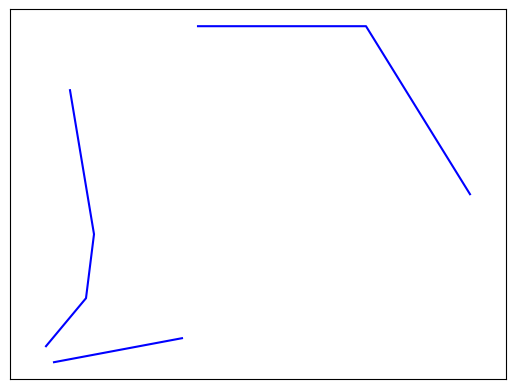

In [ ]:
# Create the pathways multiline. Create three individual lines, one for each
# path. Then add them all to the multiline geometry.
path1 = ogr.Geometry(ogr.wkbLineString)
path1.AddPoint(61.5, 29)
path1.AddPoint(63, 20)
path1.AddPoint(62.5, 16)
path1.AddPoint(60, 13)

path2 = ogr.Geometry(ogr.wkbLineString)
path2.AddPoint(60.5, 12)
path2.AddPoint(68.5, 13.5)

path3 = ogr.Geometry(ogr.wkbLineString)
path3.AddPoint(69.5, 33)
path3.AddPoint(80, 33)
path3.AddPoint(86.5, 22.5)

paths = ogr.Geometry(ogr.wkbMultiLineString)
paths.AddGeometry(path1)
paths.AddGeometry(path2)
paths.AddGeometry(path3)

# Take a look at the multiline.
vp.clear()
vp.plot(paths, 'b-')
print(paths)



MULTILINESTRING ((61.5 29.0 0,63 20 0,62.5 16.0 0,60 13 0),(60.5 12.0 0,68.5 13.5 0),(69.5 33.0 0,80 33 0,86.5 22.5 0))


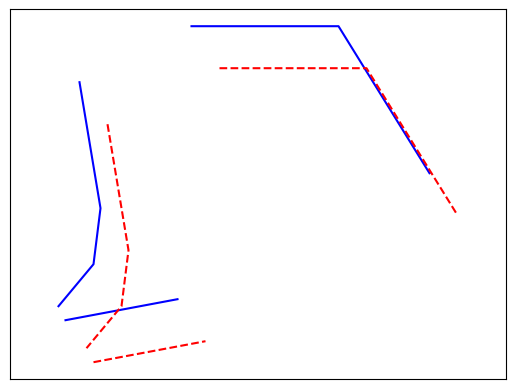

In [ ]:
def create_path(points):
    path = ogr.Geometry(ogr.wkbLineString)
    for point in points:
        path.AddPoint(*point)
    return path

def create_multi_path(paths):
    multi_path = ogr.Geometry(ogr.wkbMultiLineString)
    for path in paths:
        multi_path.AddGeometry(path)
    return multi_path

def move_path(path, dx, dy):
    for i in range(path.GetPointCount()):
        path.SetPoint(i, path.GetX(i) + dx, path.GetY(i) + dy)

# Define the points for each path
points1 = [(61.5, 29), (63, 20), (62.5, 16), (60, 13)]
points2 = [(60.5, 12), (68.5, 13.5)]
points3 = [(69.5, 33), (80, 33), (86.5, 22.5)]

# Create the paths
path1 = create_path(points1)
path2 = create_path(points2)
path3 = create_path(points3)

# Create the multi path
paths = create_multi_path([path1, path2, path3])

# Display the multi path
vp.clear()
vp.plot(paths, 'b-')
print(paths)

# Move each path
for i in range(paths.GetGeometryCount()):
    move_path(paths.GetGeometryRef(i), 2, -3)

# Display the moved paths
vp.plot(paths, 'r--')

POLYGON ((58.0 38.5 0,53 6 0,99.5 19.0 0,73 42 0,58.0 38.5 0))
Area of the yard polygon:  942.0


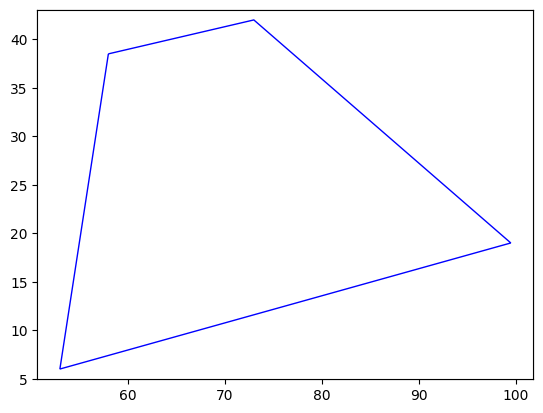

In [ ]:
# Define a function to create a polygon
def create_polygon(points):
    ring = ogr.Geometry(ogr.wkbLinearRing)
    for point in points:
        ring.AddPoint(*point)
    polygon = ogr.Geometry(ogr.wkbPolygon)
    polygon.AddGeometry(ring)
    polygon.CloseRings()
    return polygon

# Define the points for the yard boundary
yard_points = [(58, 38.5), (53, 6), (99.5, 19), (73, 42)]

# Create the yard polygon
yard = create_polygon(yard_points)

# Plot the yard polygon
vp = VectorPlotter(True)
vp.plot(yard, fill=False, edgecolor='blue')

# Print the yard polygon and its area
print(yard)
print("Area of the yard polygon: ", yard.GetArea())

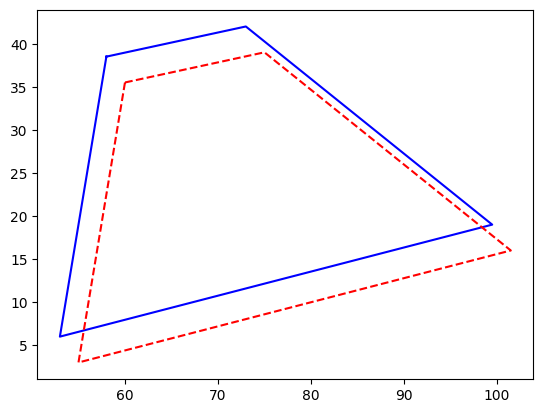

In [ ]:
from matplotlib import pyplot as plt
from shapely.geometry import Polygon
from shapely.affinity import translate

# Create the boundary polygon
boundary_polygon = Polygon([(58, 38.5), (53, 6), (99.5, 19), (73, 42)])

# Create a new polygon for the translated polygon
# move 2 units to the east and 3 units to the south
translated_polygon = translate(boundary_polygon, xoff=2, yoff=-3)

# Visualize the polygons
fig, ax = plt.subplots()

# Plot the original polygon
x, y = boundary_polygon.exterior.xy
ax.plot(x, y, color='blue')

# Plot the moved polygon
x, y = translated_polygon.exterior.xy
ax.plot(x, y, color='red', linestyle='--')

plt.show()

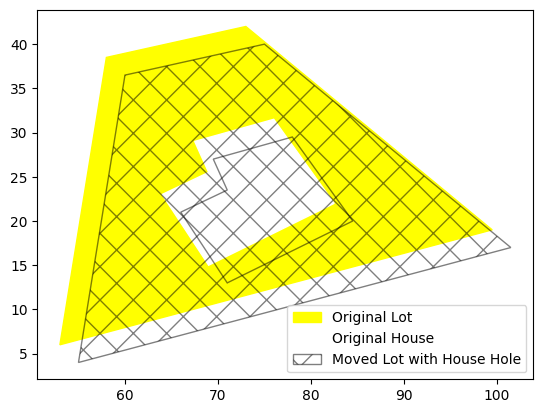

In [95]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
from matplotlib.path import Path

# Define the points for the lot and the house
lot_points = np.array([[58, 38.5], [53, 6], [99.5, 19], [73, 42], [58, 38.5]])
house_points = np.array([[67.5, 29], [69, 25.5], [64, 23], [69, 15], [82.5, 22], [76, 31.5], [67.5, 29]])

# Plot the original lot and house
plt.figure()
plt.fill(*lot_points.T, color='yellow', label='Original Lot')
plt.fill(*house_points.T, color='white', label='Original House')

# Move the yard two units south and two units east
house_points[:, 0] += 2  # Move east
house_points[:, 1] -= 2  # Move south

# Create a path for the moved lot and the moved house
lot_path = Path(lot_points, closed=True)
house_path = Path(house_points, closed=True)

# Create a compound path with the lot as the exterior and the house as the hole
codes = np.full(len(lot_points), Path.LINETO)
codes[0] = Path.MOVETO
codes[-1] = Path.CLOSEPOLY
lot_path = Path(lot_points, codes)

codes = np.full(len(house_points), Path.LINETO)
codes[0] = Path.MOVETO
codes[-1] = Path.CLOSEPOLY
house_path = Path(house_points, codes)

compound_path = Path.make_compound_path(lot_path, house_path)

# Create a patch from the compound path and add it to the plot
patch = patches.PathPatch(compound_path, facecolor='none', edgecolor='black', alpha=0.5, hatch='x', label='Moved Lot with House Hole')
plt.gca().add_patch(patch)

plt.legend()
plt.show()